In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df1=pd.read_csv ('Amazon.csv')

In [6]:
df2=df1
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36797 entries, 0 to 36796
Data columns (total 9 columns):
Date            36797 non-null object
asin            36797 non-null object
helpful         36797 non-null object
overall         36797 non-null int64
reviewText      36797 non-null object
reviewTime      36797 non-null object
reviewerID      36797 non-null object
reviewerName    36797 non-null object
summary         36797 non-null object
dtypes: int64(1), object(8)
memory usage: 2.5+ MB


In [7]:
df2.head(3)

,Date,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary
0,"05 3, 2014",B000H00VBQ,"[0, 0]",2,I had big expectations because I love English ...,"05 3, 2014",A11N155CW1UV02,AdrianaM,A little bit boring for me
1,"09 3, 2012",B000H00VBQ,"[0, 0]",5,I highly recommend this series. It is a must f...,"09 3, 2012",A3BC8O2KCL29V2,Carol T,Excellent Grown Up TV
2,"10 16, 2013",B000H00VBQ,"[0, 1]",1,This one is a real snoozer. Don't believe anyt...,"10 16, 2013",A60D5HQFOTSOM,"Daniel Cooper ""dancoopermedia""",Way too boring for me


In [8]:
df=df2

In [9]:
n_reviews = len(df)
n_critics = df.reviewerID.unique().size
n_movies = df.asin.unique().size

print("Number of reviews: {:d}".format(n_reviews))
print("Number of critics: {:d}".format(n_critics))
print("Number of movies:  {:d}".format(n_movies))

Number of reviews: 36797
Number of critics: 5130
Number of movies:  1683


In [22]:
grp = df.groupby('reviewerID')
counts = grp.reviewerID.count()  # number of reviews by each critic
means = grp.overall.mean()     # average freshness for each critic

means[counts > 10].hist(bins=10, edgecolor='w', lw=1)
plt.xlabel("Average Rating per ID")
plt.ylabel("Number of reviewer")
plt.yticks([0, 30, 60, 90, 120, 150]);

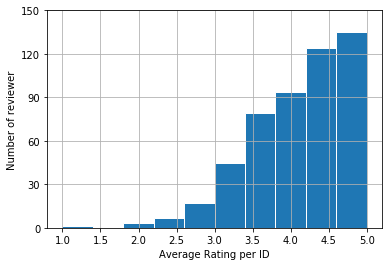

In [23]:
plt.show()

In [27]:
def make_xy(df, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer() 
    X = vectorizer.fit_transform(df.reviewText) 
    X = X.tocsc()  # some versions of sklearn return COO format
    y = df.overall.astype(np.int) 
    return X, y


In [66]:
X

<36797x53938 sparse matrix of type '<class 'numpy.int64'>'
	with 2192524 stored elements in Compressed Sparse Column format>

In [65]:
pd.DataFrame(data=X[1:,1:],    # values
             index=X[1:,0],    # 1st column as index
             columns=X[0,1])  # 1st row as the column names

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
y_pred=NB.predict(X_test)
NB.score(X_train,y_train)

0.7042497537113157

In [38]:
NB.score(X_test,y_test)

0.5902173913043478

In [39]:
# run too much time, how can I reduce the running time?
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
# call `fit` to build the vocabulary
data=df.reviewText
vectorizer.fit(data)
# call `transform` to convert text to a bag of words
x = vectorizer.transform(data)
z=x.toarray()
c=vectorizer.get_feature_names()
mydata=pd.DataFrame(z,columns=c) # columns numbers = feature numbers
xx=(mydata>0).sum(0)

Text(0,0.5,'percentage of words')

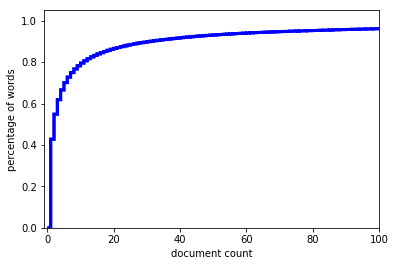

In [40]:
plt.hist(xx, bins=range(1000), histtype='step', color='b', cumulative=True, linewidth=3, normed=1)
plt.xlim(-1,100) 
plt.xlabel('document count')
plt.ylabel ('percentage of words')
plt.show()

In [74]:
mydata.head(1)

,00,000,0031,007,009so,00p,00pm,00s,01,02,...,zuma,zuzu,zweig,zwick,zygomatics,zyklon,zzzzz,zzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.model_selection import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit the classifier, passed is as clf.
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [47]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    rotten = y == 0
    fresh = ~rotten
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

In [48]:
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(df.shape[0]), train_size=0.7, test_size=0.3)
mask = np.zeros(df.shape[0], dtype=np.bool)
mask[itest] = True

In [76]:
clf = MultinomialNB()

In [51]:
cv_score(clf,X,y,log_likelihood)

-132568.58816713426

In [78]:
vectorizer = CountVectorizer(min_df=10)
X, y = make_xy(df, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=1).fit(xtrain, ytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.752083
Accuracy on test data:     0.601235


In [77]:
# np.where(np.isnan(mydata))

In [80]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(ytest, clf.predict(xtest)))

In [81]:
vectorizer.get_feature_names()[-10:]

['zen',
 'zero',
 'ziva',
 'zoe',
 'zoey',
 'zombie',
 'zombies',
 'zone',
 'zoo',
 'zooey']

In [82]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

In [83]:
good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

In [84]:
print("Good words\t     P(fresh | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad words\t     P(fresh | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(fresh | word)
              hooked 1.00
             enjoyed 1.00
           excellent 1.00
             awesome 1.00
              superb 0.99
                8211 0.99
            terrific 0.99
             current 0.99
               helps 0.99
               likes 0.99
Bad words	     P(fresh | word)
          misleading 0.57
              stinks 0.57
               tripe 0.56
                 yuk 0.56
              bombed 0.56
          christians 0.56
                cape 0.53
            censored 0.53
         denominator 0.52
              wrecks 0.50


In [107]:
vectorizer = CountVectorizer(min_df=10)
X, y = make_xy(df, vectorizer)
clf = MultinomialNB(alpha = 1).fit(X,y)

In [108]:
new_data = "it's excellent experience and i enjoyed watching it"

clf.predict(vectorizer.transform([new_data]))
print(1-clf.predict_proba(vectorizer.transform([new_data]))[:, 1])

[0.99835971]


In [99]:
# try logistic part.

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36797 entries, 0 to 36796
Data columns (total 9 columns):
Date            36797 non-null object
asin            36797 non-null object
helpful         36797 non-null object
overall         36797 non-null int64
reviewText      36797 non-null object
reviewTime      36797 non-null object
reviewerID      36797 non-null object
reviewerName    36797 non-null object
summary         36797 non-null object
dtypes: int64(1), object(8)
memory usage: 2.5+ MB


In [115]:
two = []

for i in range(36797):
    if df1.overall[i]>3:
        two.append('good')
    else:
        two.append('bad')


In [117]:
df1.insert(9, 'class', two)

In [129]:
df1.head(2)

,Date,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,class
0,"05 3, 2014",B000H00VBQ,"[0, 0]",2,I had big expectations because I love English ...,"05 3, 2014",A11N155CW1UV02,AdrianaM,A little bit boring for me,bad
1,"09 3, 2012",B000H00VBQ,"[0, 0]",5,I highly recommend this series. It is a must f...,"09 3, 2012",A3BC8O2KCL29V2,Carol T,Excellent Grown Up TV,good


In [135]:
df1['class'].head(2)

0     bad
1    good
Name: class, dtype: object

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df1.overall.values, 
                                              (df1['class'] == "good").values,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr.reshape(-1, 1), ylr.reshape(-1, 1))
# Print the accuracy from the testing data.
print('train accuracy:', accuracy_score(clf.predict(Xlr),ylr))
print('test accuracy:',accuracy_score(clf.predict(Xtestlr), ytestlr))
# the goal of regularization is to decrease the gap.

/Users/mac/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Expected 2D array, got 1D array instead:
array=[3 5 1 ... 5 4 5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.